In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Keylogger_Detection.csv')
df.head(5)

<ipython-input-4-42f6e3a22a71>:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Keylogger_Detection.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
from sklearn.preprocessing import LabelEncoder

df[' Destination IP'] = LabelEncoder().fit_transform(df[' Destination IP'])
df[' Source IP'] = LabelEncoder().fit_transform(df[' Source IP'])
df['Class'] = LabelEncoder().fit_transform(df['Class'])

df = df.select_dtypes(include=[np.number])
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.dropna()
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,6,34451.0,2307,443.0,6.0,12140931.0,9.0,6.0,334.0,3664.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5,53892.0,929,443.0,6.0,418882.0,102.0,203.0,829.0,279509.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,491,443.0,10,50750.0,6.0,45.0,2.0,0.0,55.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6,23025.0,9,53.0,17.0,541699.0,1.0,1.0,39.0,225.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,52602.0,393,443.0,6.0,7310795.0,3.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
feature_names = df.columns

target = ['Class']
features = [c for c in df.columns if c != "Class"]
# Fit the scaler to the data and transform the data
df[features] = scaler.fit_transform(df[features])

df.head(10)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,-0.314334,-0.210447,1.525004,-0.368579,-0.468869,0.042412,-0.004811,-0.036722,-0.013233,-0.038629,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
1,-0.317397,0.828488,0.017335,-0.368579,-0.468869,-0.465677,0.945481,0.575336,-0.004001,0.556643,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
2,1.171434,-2.027850,-0.988143,2.839491,-0.468869,-0.483832,-0.076338,-0.055364,-0.018437,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
3,-0.314334,-0.821058,-0.989237,-0.393449,2.036974,-0.460354,-0.086556,-0.052257,-0.018736,-0.046050,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
4,-0.314334,0.759550,-0.569102,-0.368579,-0.468869,-0.166949,-0.066120,-0.055364,-0.019463,-0.046536,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
5,-0.317397,1.027981,0.126745,-0.368579,-0.468869,-0.483499,-0.076338,-0.055364,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
6,1.284781,-2.027850,-0.987049,2.019602,-0.468869,-0.483735,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
7,-0.314334,0.318132,-0.037370,-0.368579,-0.468869,2.063657,-0.045683,-0.036722,0.008440,-0.043994,...,0.004137,-0.054223,-0.063066,-0.066458,-0.036581,3.583540,-0.121636,3.366029,3.703867,1
8,-0.314334,0.486095,1.302902,-0.368579,-0.468869,0.324113,-0.035465,-0.042936,-0.008869,-0.046208,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
9,-0.311270,0.837520,1.407936,-0.368579,-0.468869,-0.481683,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0


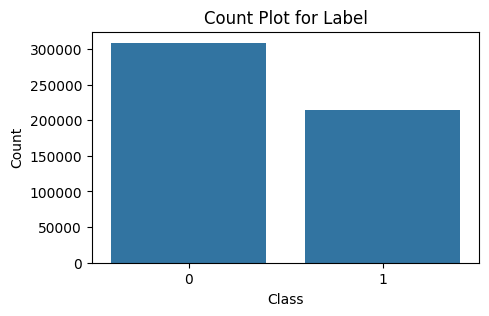

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot for Label')
plt.show()

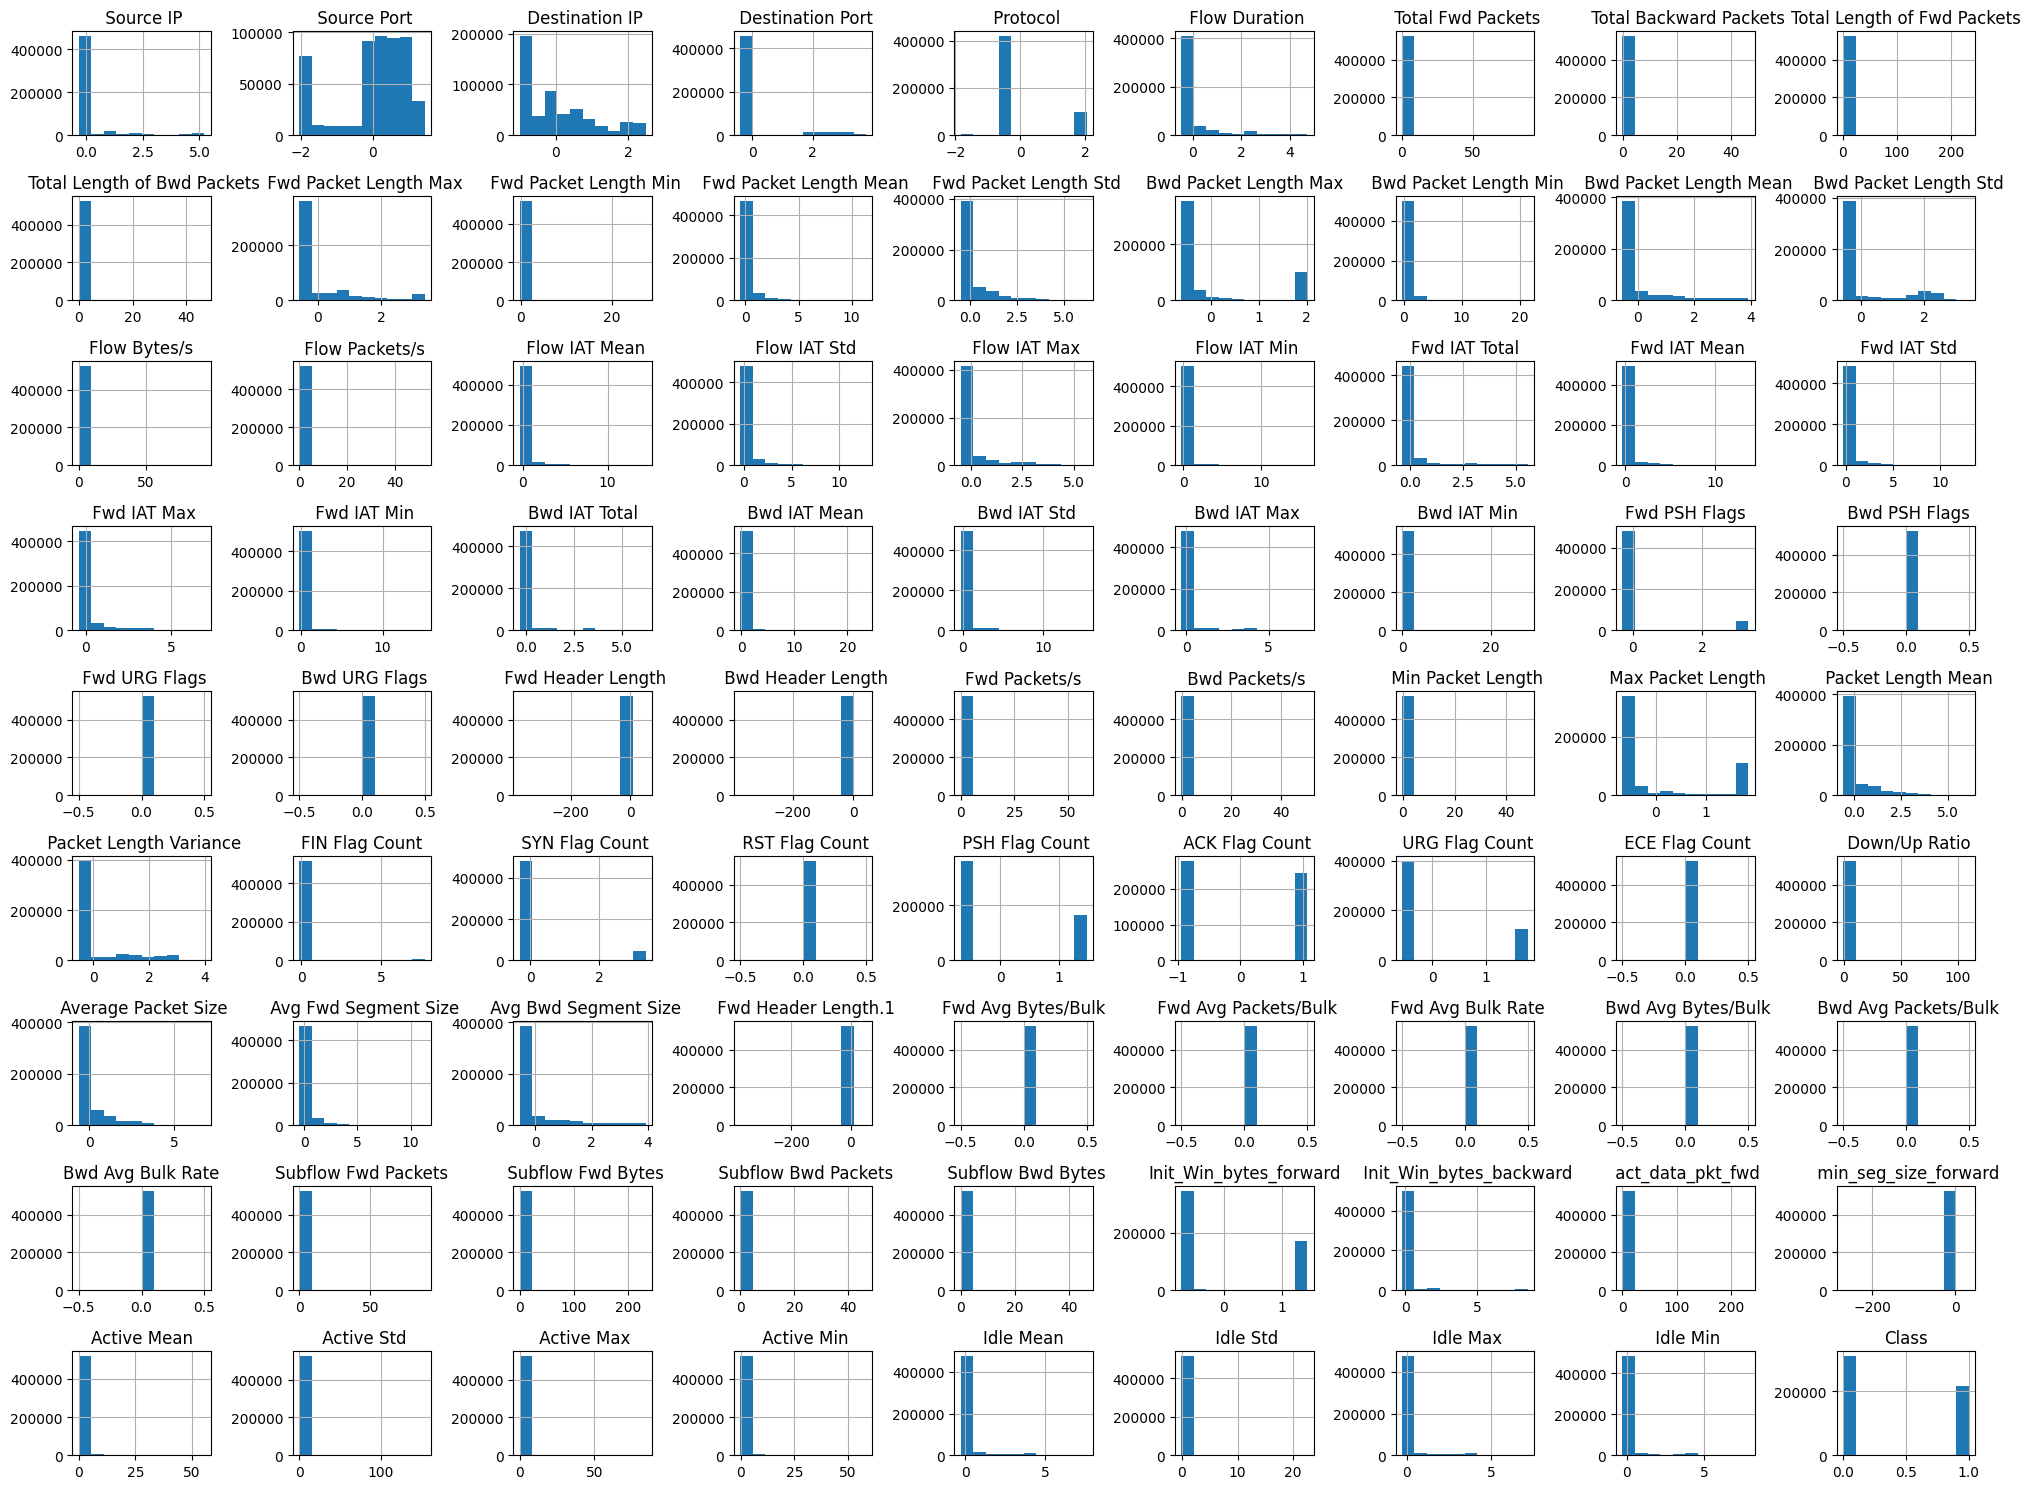

In [ ]:
df.hist(figsize=(20, 15))  # Adjust the fig size as needed
plt.tight_layout()
plt.savefig('dist.png')  # To avoid overlap of subplots
plt.show()

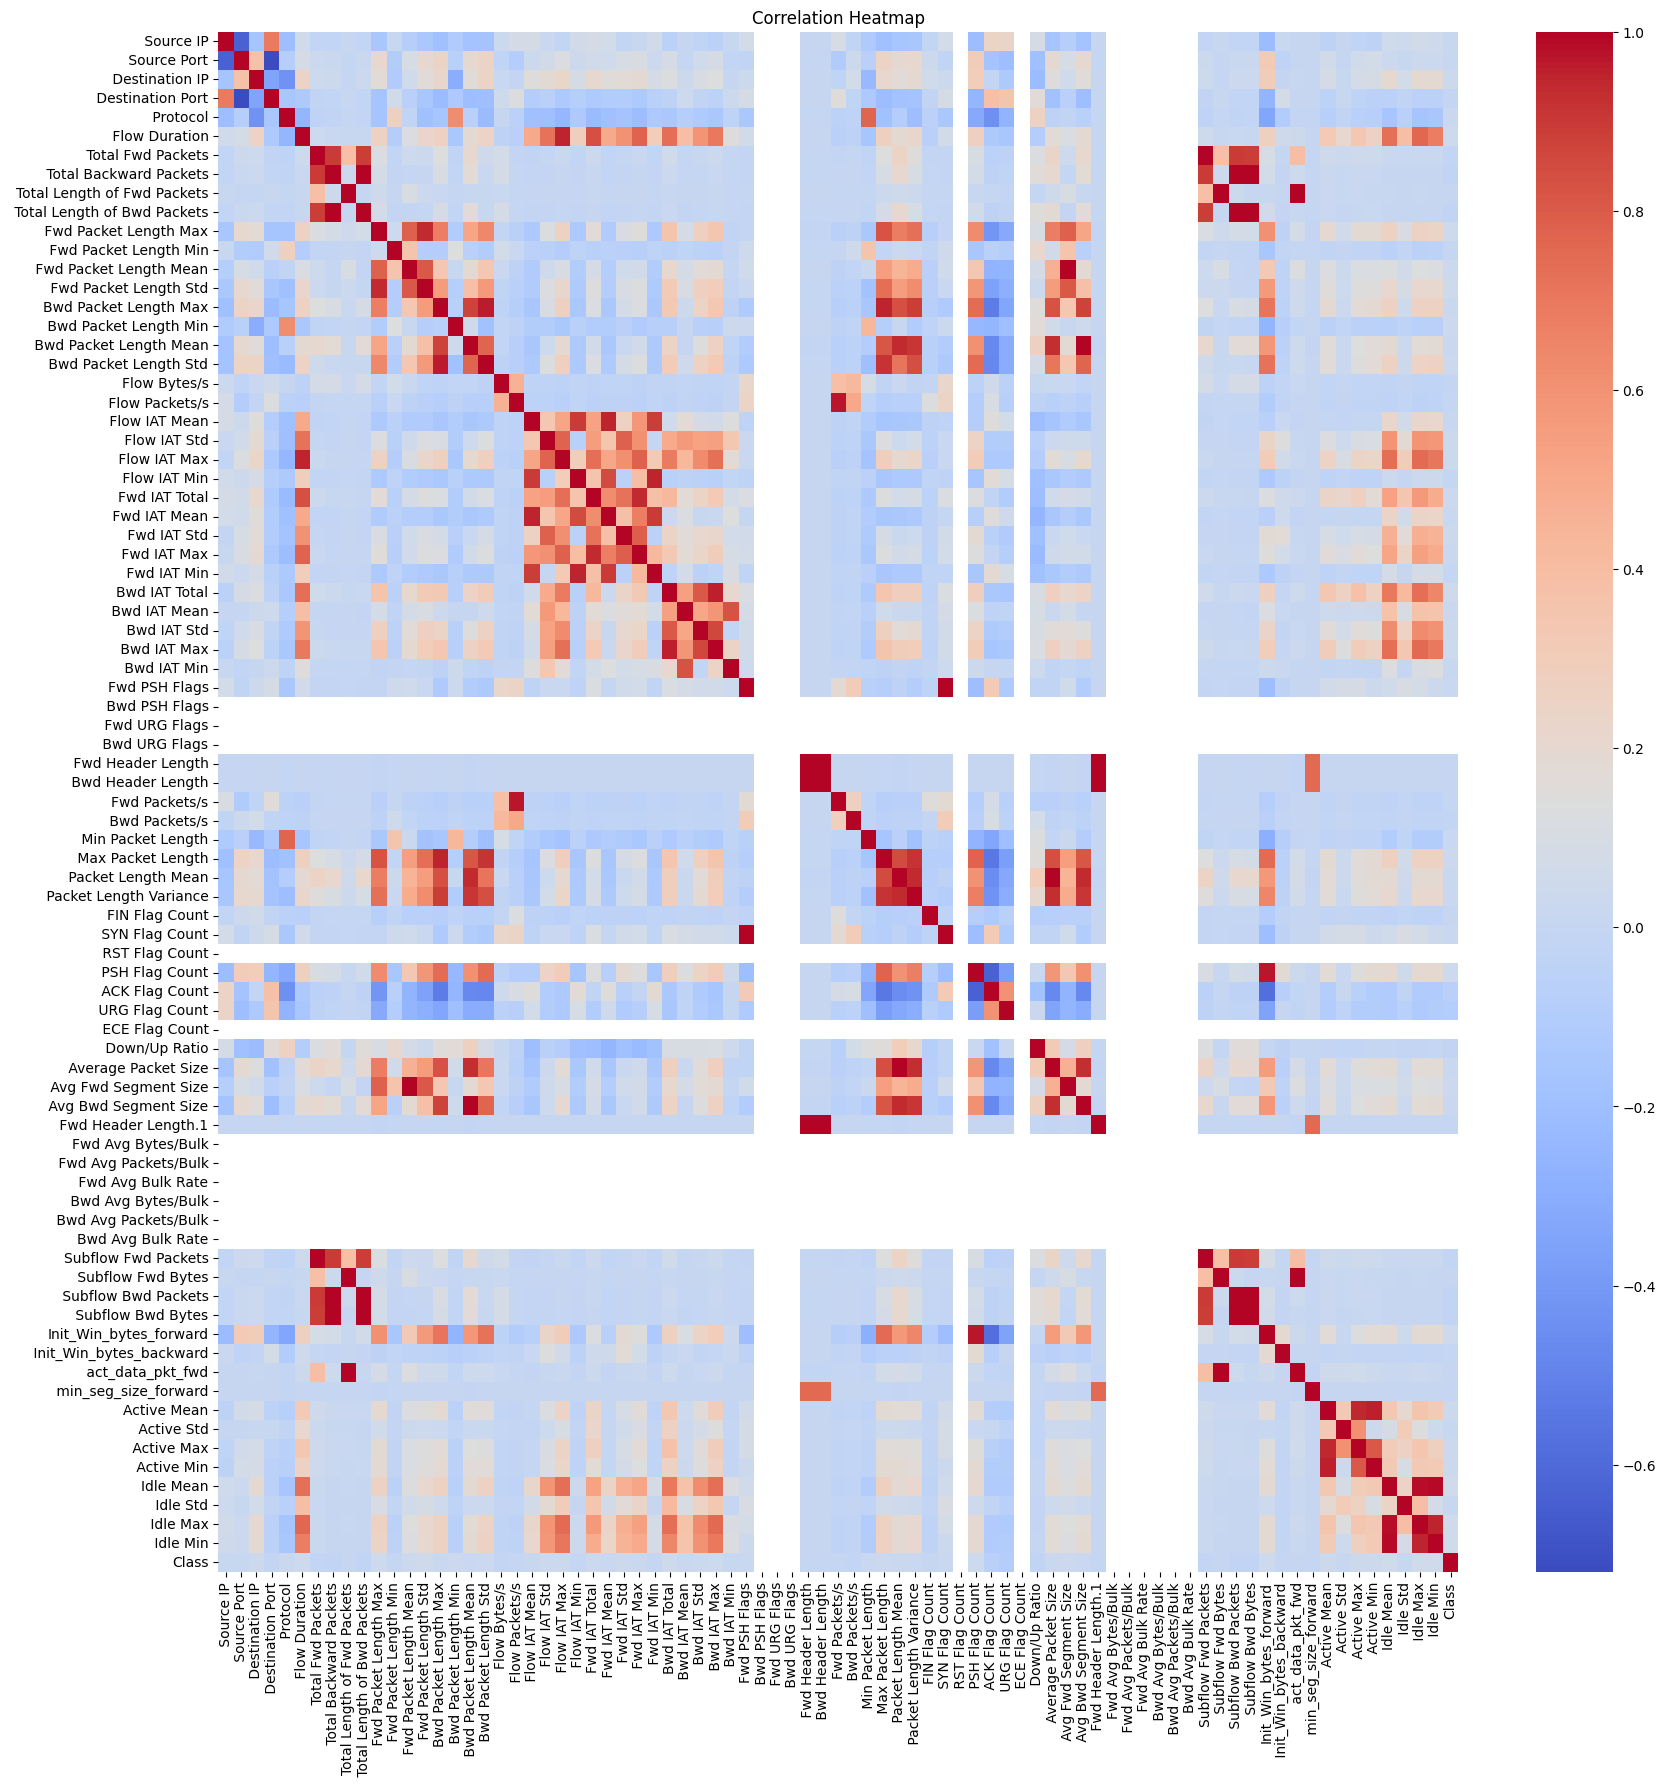

In [ ]:
corr = df[df.columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('corr.png', dpi=900)  # Save the plot with 300 dpi

plt.show()

In [ ]:
features = [c for c in df.columns if c != "Class"]

# Assuming 'data' is your DataFrame containing the features
correlation_matrix = df[features].corr().abs()

# Create a mask to ignore diagonal and lower triangular values
mask = (correlation_matrix
        .where(np.triu(np.ones(correlation_matrix.shape), k=1)
               .astype(bool)))

# Find features with correlation greater than a threshold (e.g., 0.7)
high_corr_features = [column for column in mask.columns if any(mask[column] > 0.7)]

# Drop the highly correlated features
df = df.drop(high_corr_features, axis=1)

In [ ]:
features = [c for c in df.columns if c != "Class"]

df.head()

,Source IP,Source Port,Destination IP,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,...,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Class
0,-0.314334,-0.210447,1.525004,-0.468869,0.042412,-0.004811,-0.013233,-0.021233,-0.212204,1.992624,...,0.0,0.0,0.0,0.0,0.0,-0.205157,-0.183877,-0.063066,-0.121636,0
1,-0.317397,0.828488,0.017335,-0.468869,-0.465677,0.945481,-0.004001,0.815443,-0.212204,1.938670,...,0.0,0.0,0.0,0.0,0.0,-0.197717,-0.183877,-0.063066,-0.121636,0
2,1.171434,-2.027850,-0.988143,-0.468869,-0.483832,-0.076338,-0.018437,-0.435510,-0.212204,-0.611579,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
3,-0.314334,-0.821058,-0.989237,2.036974,-0.460354,-0.086556,-0.018736,-0.478833,0.522900,-0.206920,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
4,-0.314334,0.759550,-0.569102,-0.468869,-0.166949,-0.066120,-0.019463,-0.584433,-0.212204,-0.611579,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,classification_report


def evaluate_classification(y_true, y_predict, model_name):
    # Calculate metrics
    accuracy_scr = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)

    # Create a classification report
    report = classification_report(y_true, y_predict, output_dict=True)

    # Create a bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [accuracy_scr, precision, recall, f1]

    colors = sns.color_palette("pastel")

    plt.figure(figsize=(5, 4))
    bars = plt.bar(metrics, values, color=colors)
    plt.ylabel('Score')
    plt.title('Performance Metrics ' + model_name)
    plt.ylim(0, 1)  # Set the y-axis limits

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value / 1.1, str(round(value, 2)), ha='center', va='center',
                 color='black')
    plt.savefig(model_name + str(time) + '.png')
    plt.show()
    print("Accuracy:", accuracy_scr)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n\nClassification Report:\n", report)
    # Return metrics and report
    return {
        'accuracy': accuracy_scr,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': report
    }

In [ ]:
X = df[features].values
y = df[target].values  # Target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418876, 37), (104719, 37), (418876, 1), (104719, 1))

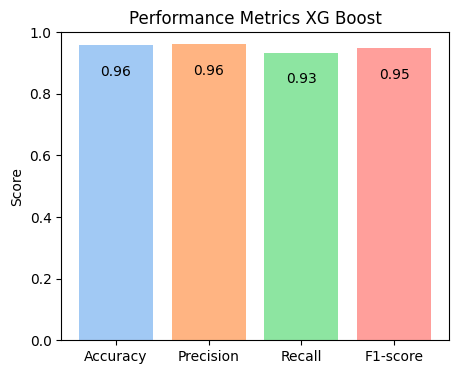

Accuracy: 0.9579636933125794
Precision: 0.9632107825503033
Recall: 0.9333503753108224
F1-score: 0.948045510338967


Classification Report:
 {'0': {'precision': 0.9544920821300499, 'recall': 0.9751329269874206, 'f1-score': 0.9647021088926309, 'support': 61688.0}, '1': {'precision': 0.9632107825503033, 'recall': 0.9333503753108224, 'f1-score': 0.948045510338967, 'support': 43031.0}, 'accuracy': 0.9579636933125794, 'macro avg': {'precision': 0.9588514323401767, 'recall': 0.9542416511491215, 'f1-score': 0.956373809615799, 'support': 104719.0}, 'weighted avg': {'precision': 0.9580747595599711, 'recall': 0.9579636933125794, 'f1-score': 0.9578576003281611, 'support': 104719.0}}


Training Time: 52.2969925403595 seconds


In [ ]:
import xgboost as xgb
import time

# Convert datasets to DMatrix format for XGBoost
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 20,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Train the model
start_time = time.time()

num_rounds = 100
xgb_model = xgb.train(params, d_train, num_rounds)

end_time = time.time()

training_time = end_time - start_time
# Make predictions
y_pred_proba = xgb_model.predict(d_test)
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

evaluate_classification(y_test, y_pred, 'XG Boost')

print(f"\n\nTraining Time: {training_time} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Time: 259.2843282222748 seconds


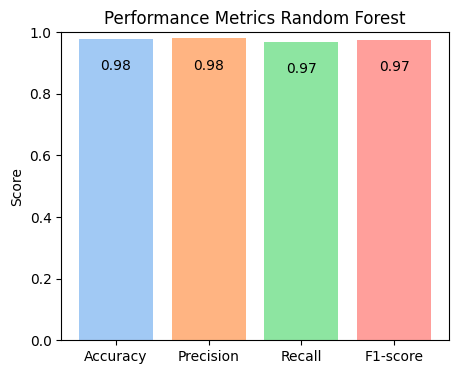

Accuracy: 0.9791632845997383
Precision: 0.9811085200103644
Recall: 0.967930096906881
F1-score: 0.974474755509803


Classification Report:
 {'0': {'precision': 0.9778370218096554, 'recall': 0.9869990922059396, 'f1-score': 0.9823966955483486, 'support': 61688.0}, '1': {'precision': 0.9811085200103644, 'recall': 0.967930096906881, 'f1-score': 0.974474755509803, 'support': 43031.0}, 'accuracy': 0.9791632845997383, 'macro avg': {'precision': 0.97947277091001, 'recall': 0.9774645945564103, 'f1-score': 0.9784357255290759, 'support': 104719.0}, 'weighted avg': {'precision': 0.9791813417427593, 'recall': 0.9791632845997383, 'f1-score': 0.9791414218941057, 'support': 104719.0}}


{'accuracy': 0.9791632845997383,
 'precision': 0.9811085200103644,
 'recall': 0.967930096906881,
 'f1': 0.974474755509803,
 'classification_report': {'0': {'precision': 0.9778370218096554,
   'recall': 0.9869990922059396,
   'f1-score': 0.9823966955483486,
   'support': 61688.0},
  '1': {'precision': 0.9811085200103644,
   'recall': 0.967930096906881,
   'f1-score': 0.974474755509803,
   'support': 43031.0},
  'accuracy': 0.9791632845997383,
  'macro avg': {'precision': 0.97947277091001,
   'recall': 0.9774645945564103,
   'f1-score': 0.9784357255290759,
   'support': 104719.0},
  'weighted avg': {'precision': 0.9791813417427593,
   'recall': 0.9791632845997383,
   'f1-score': 0.9791414218941057,
   'support': 104719.0}}}

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier(n_estimators=150)
start_time = time.time()

# Train the model on the training data
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# Predict on the testing data
y_pred = random_forest.predict(X_test)

evaluate_classification(y_test, y_pred, 'Random Forest')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time: 1.1782019138336182 seconds


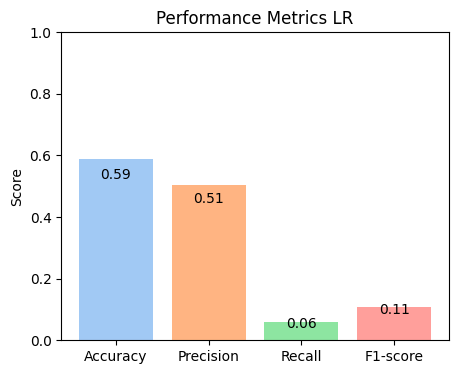

Accuracy: 0.5896351187463593
Precision: 0.5057086614173228
Recall: 0.05970114568566847
F1-score: 0.10679470391386585


Classification Report:
 {'0': {'precision': 0.5939140296470258, 'recall': 0.9592951627545065, 'f1-score': 0.73362797299894, 'support': 61688.0}, '1': {'precision': 0.5057086614173228, 'recall': 0.05970114568566847, 'f1-score': 0.10679470391386585, 'support': 43031.0}, 'accuracy': 0.5896351187463593, 'macro avg': {'precision': 0.5498113455321743, 'recall': 0.5094981542200875, 'f1-score': 0.4202113384564029, 'support': 104719.0}, 'weighted avg': {'precision': 0.5576687904803764, 'recall': 0.5896351187463593, 'f1-score': 0.4760504330873688, 'support': 104719.0}}


{'accuracy': 0.5896351187463593,
 'precision': 0.5057086614173228,
 'recall': 0.05970114568566847,
 'f1': 0.10679470391386585,
 'classification_report': {'0': {'precision': 0.5939140296470258,
   'recall': 0.9592951627545065,
   'f1-score': 0.73362797299894,
   'support': 61688.0},
  '1': {'precision': 0.5057086614173228,
   'recall': 0.05970114568566847,
   'f1-score': 0.10679470391386585,
   'support': 43031.0},
  'accuracy': 0.5896351187463593,
  'macro avg': {'precision': 0.5498113455321743,
   'recall': 0.5094981542200875,
   'f1-score': 0.4202113384564029,
   'support': 104719.0},
  'weighted avg': {'precision': 0.5576687904803764,
   'recall': 0.5896351187463593,
   'f1-score': 0.4760504330873688,
   'support': 104719.0}}}

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_reg = LogisticRegression(max_iter=10000)

start_time = time.time()

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Predict on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
evaluate_classification(y_test, y_pred, 'LR')

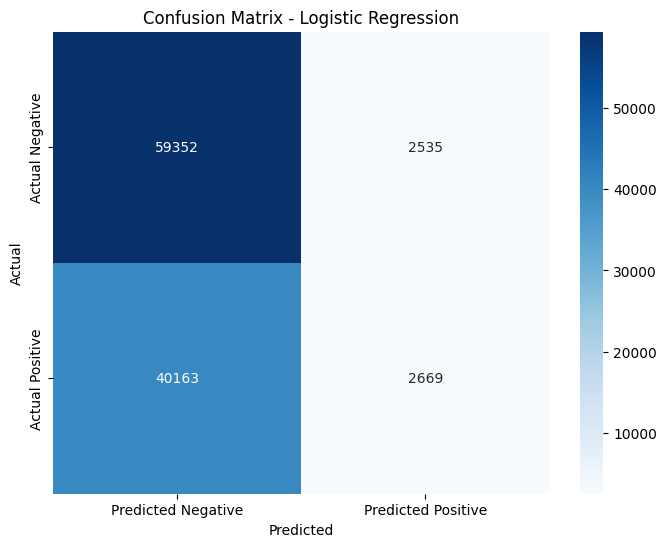

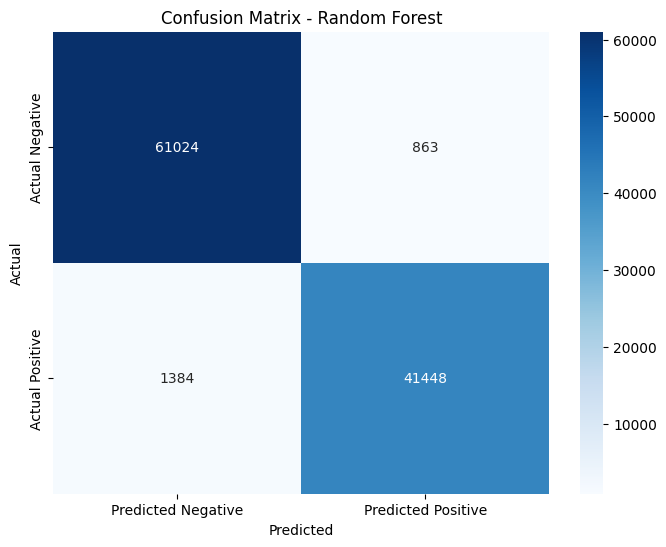

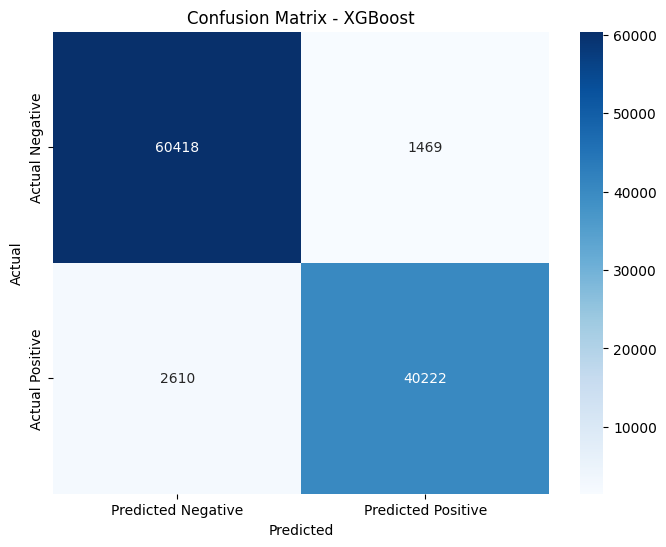

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models and their names
models = {
    "Logistic Regression": logistic_reg,
    "Random Forest": random_forest,
    "XGBoost": xgb_model  # For XGBoost, use the trained model (e.g., xgb_model)
}

# Loop through all models and plot confusion matrix
for model_name, model in models.items():
    # For Logistic Regression and Random Forest, use `predict()`
    if model_name == "XGBoost":
        # For XGBoost, we use `predict` for class labels, based on probability threshold
        y_pred = [1 if proba >= 0.5 else 0 for proba in model.predict(d_test)]
    else:
        # For Logistic Regression and Random Forest, we can directly use `predict()`
        y_pred = model.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
